In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Complain,Age,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,1,0,54,2014,6,16,0,1190,15,1
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,1,0,63,2014,6,15,0,577,18,5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,0,0,66,2014,5,13,1,251,11,2
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,0,0,57,2014,11,5,2,11,4,7
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,1,0,35,2014,8,4,1,91,8,7


In [35]:
# We define the encoders first for our categorical variables.
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

from sklearn.preprocessing import LabelEncoder
def one_label_encode(data, column):
    encoder = LabelEncoder()
    data['Label-Encode ' + column] = encoder.fit_transform(data[column])
    data = data.drop(column, axis = 1)
    return data

## Feature Engineering

In [36]:
# We drop first the features that we have profiled to be not helpful to the model with little sample size or little use cases
features = df.drop(columns=['Age', 'Kidhome', 'Teenhome', 'Recency', 'ID', 'MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
              'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Month Of Enrollment',
              'Day Of Enrollment'])
features.head()

Year Of Enrollment
2013    1005
2014     489
2012     429
Name: count, dtype: int64

In [37]:
# Since Year of Enrollment could be considered its own label. Let us encode it
# Convert 'Year_of_Enrollment' column to categorical type
features['Year Of Enrollment'] = features['Year Of Enrollment'].astype('category')
features = pd.get_dummies(features, columns=['Year Of Enrollment'], prefix='Year Of Enrollment')
# Also encode Education and Marital_Status
features = one_hot_encode(features, 'Education')
features = one_hot_encode(features, 'Marital_Status')
features.head()

,Income,Response,Household,Total_Spent,Total_Purchases,Total_Visits,Year Of Enrollment_2012,Year Of Enrollment_2013,Year Of Enrollment_2014,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,84835,1,0,1190,15,1,False,False,True,False,True,False,False,False,False,False,False
1,57091,1,0,577,18,5,False,False,True,False,True,False,False,False,True,False,False
2,67267,0,1,251,11,2,False,False,True,False,True,False,False,True,False,False,False
3,32474,0,2,11,4,7,False,False,True,False,True,False,False,False,False,True,False
4,21474,1,1,91,8,7,False,False,True,False,True,False,False,False,True,False,False


## Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
X = features.drop(columns=['Response'], axis = 1)
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape
X_train.head()

,Income,Household,Total_Spent,Total_Purchases,Total_Visits,Year Of Enrollment_2012,Year Of Enrollment_2013,Year Of Enrollment_2014,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
1256,33590,3,8,4,72,False,True,False,False,True,False,False,False,False,True,False
483,46015,2,46,5,32,False,False,True,False,False,False,True,False,False,True,False
740,43638,1,201,11,44,True,False,False,False,True,False,False,False,False,False,True
1025,47025,1,415,17,58,False,True,False,False,True,False,False,False,True,False,False
456,42000,0,653,20,28,False,True,False,False,False,False,True,False,True,False,False


In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear', random_state=0)
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

In [41]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
lg_acc = accuracy_score(y_test, lg_pred)
lg_prec = precision_score(y_test, lg_pred)
lg_rec = recall_score(y_test, lg_pred)
lg_f1 = f1_score(y_test, lg_pred)
lg_auc = roc_auc_score(y_test, lg_pred)
print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

# Check for overfitting
print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_test, y_test)))

Logistic Regression Accuracy: 0.8475
Logistic Regression Precision: 0.5312
Logistic Regression Recall: 0.1889
Logistic Regression F1: 0.2787
Logistic Regression AUC: 0.5790
Training set score: 0.8692
Test set score: 0.8475


Confusion matrix

 [[472  15]
 [ 73  17]]

True Positives(TP) =  472

True Negatives(TN) =  17

False Positives(FP) =  15

False Negatives(FN) =  73


<Axes: >

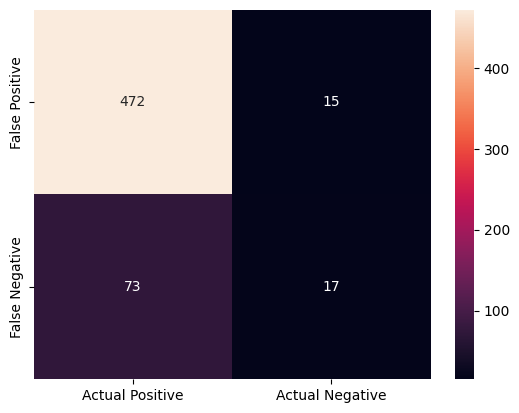

In [42]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d')